Consider the below dataset,

In [1]:
import pandas as pd

df = pd.read_csv('/kaggle/input/stores-preprocessed-version/StoresPrep.csv')

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118 entries, 0 to 117
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Store_Number     118 non-null    int64  
 1   AreaStore        118 non-null    float64
 2   Property         118 non-null    object 
 3   Type             118 non-null    object 
 4   Old/New          118 non-null    object 
 5   Checkout Number  106 non-null    float64
 6   Revenue          118 non-null    int64  
dtypes: float64(2), int64(2), object(3)
memory usage: 6.6+ KB


In [4]:
df.head(5)

,Store_Number,AreaStore,Property,Type,Old/New,Checkout Number,Revenue
0,1,2100.0,Owned,Hyper,New,6.0,45072000
1,2,1290.0,Cooperate,Extra,New,5.0,7416000
2,3,500.0,Rental,Express,New,NaN,8592000
3,4,2000.0,Owned,Hyper,New,9.0,48415500
4,5,220.0,Rental,Express,Old,2.0,3345500


1. Make descriptive statistics (basic and advanced statistics or frequency table) for all categorical and continuous variables with one suitable graph for each.

In [5]:
# Separating categorical and continuous variables

categorical_var = ['Property', 'Type', 'Old/New']
continuous_var = ['AreaStore', 'Checkout Number', 'Revenue']

In [6]:
# Descriptive Statistics: Categorical Variables


# Frequency table for categorical variables

def frequency_table(variable):

    # Get unique elements and their counts
    unique_elements, counts = np.unique(variable.dropna(), return_counts=True)

    # Calculate percentages
    percentages = (counts / len(variable)) * 100

    # Create a dictionary to store the value counts and percentages
    value_counts_and_percentages = zip(unique_elements, counts, percentages)

    # Print the value counts and percentages
    for i, j, k in value_counts_and_percentages:
        print(f"{i}: Count: {j}, Percentage: {k:.2f}%")
    return


# Calculate frequency table and mode for each categorical variable
for var in categorical_var:
    print (f"frequency table for {var}")
    frequency_table(df[var])
    print("Mode =", df[var].mode()[0])
    print ("#"*50)

frequency table for Property
Cooperate: Count: 29, Percentage: 24.58%
Owned: Count: 41, Percentage: 34.75%
Rental: Count: 33, Percentage: 27.97%
Rental/Cooperate: Count: 15, Percentage: 12.71%
Mode = Owned
##################################################
frequency table for Type
Express: Count: 55, Percentage: 46.61%
Extra: Count: 36, Percentage: 30.51%
Hyper: Count: 27, Percentage: 22.88%
Mode = Express
##################################################
frequency table for Old/New
New: Count: 102, Percentage: 86.44%
Old: Count: 16, Percentage: 13.56%
Mode = New
##################################################


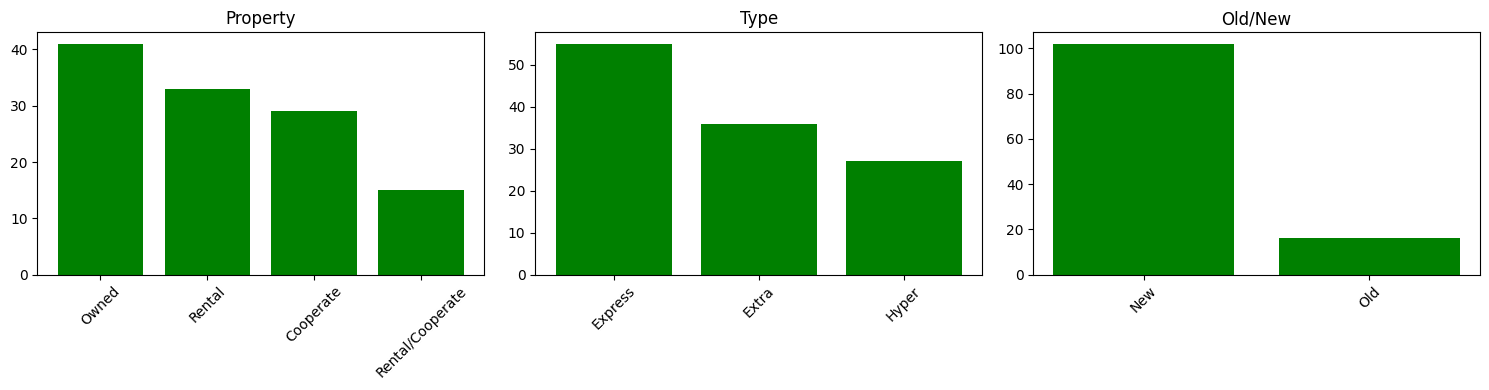

In [7]:
# Chart for categorical variables

def categorical_bar_charts(cat_var, df):
    n = len(cat_var)

    fig, axes = plt.subplots(1, n, figsize=(5 * n, 4))

    for i, var in enumerate(cat_var):
        counts = df[var].dropna().value_counts()
        axes[i].bar(counts.index, counts.values, color='green')
        axes[i].set_title(f"{var}")
        axes[i].tick_params(axis='x', rotation=45)

    plt.tight_layout()
    plt.show()


categorical_bar_charts(categorical_var, df)

In [8]:
# Descriptive Statistics: Continuous Variables


def describe_continuous(df, continuous_var, confidence_level=0.95):
    # Calculate basic statistics
    desc = df[continuous_var].describe().T

    # Skewness and elongation
    skewness = df[continuous_var].skew().rename('skewness')
    kurtosis = df[continuous_var].kurtosis().rename('kurtosis')

    # Combining all the statistics
    summary = pd.concat([desc, skewness, kurtosis], axis=1)

    # Confidence interval
    for var in continuous_var:
        values = df[var].dropna()
        mean = values.mean()
        std_error = stats.sem(values)

        if std_error != 0 and len(values) > 1:
            lower, upper = stats.t.interval(confidence_level, len(values) - 1, loc=mean, scale=std_error)
        else:
            lower, upper = mean, mean

        summary.loc[var, 'lower_ci'] = lower
        summary.loc[var, 'upper_ci'] = upper

    return summary




result = describe_continuous(df, continuous_var)
print(result)

                 count          mean           std        min        25%  \
AreaStore        118.0  1.373608e+03  1.092453e+03       82.0      530.5   
Checkout Number  106.0  4.792453e+00  2.820729e+00        1.0        3.0   
Revenue          118.0  2.299805e+07  2.051452e+07  2336000.0  9021375.0   

                        50%         75%          max  skewness  kurtosis  \
AreaStore            1000.0      1887.5       5600.0  1.560814  2.521391   
Checkout Number         4.0         6.0         14.0  1.259098  1.219605   
Revenue          13584750.0  31050500.0  100083000.0  1.533846  2.270496   

                     lower_ci      upper_ci  
AreaStore        1.174438e+03  1.572779e+03  
Checkout Number  4.249214e+00  5.335692e+00  
Revenue          1.925795e+07  2.673816e+07  


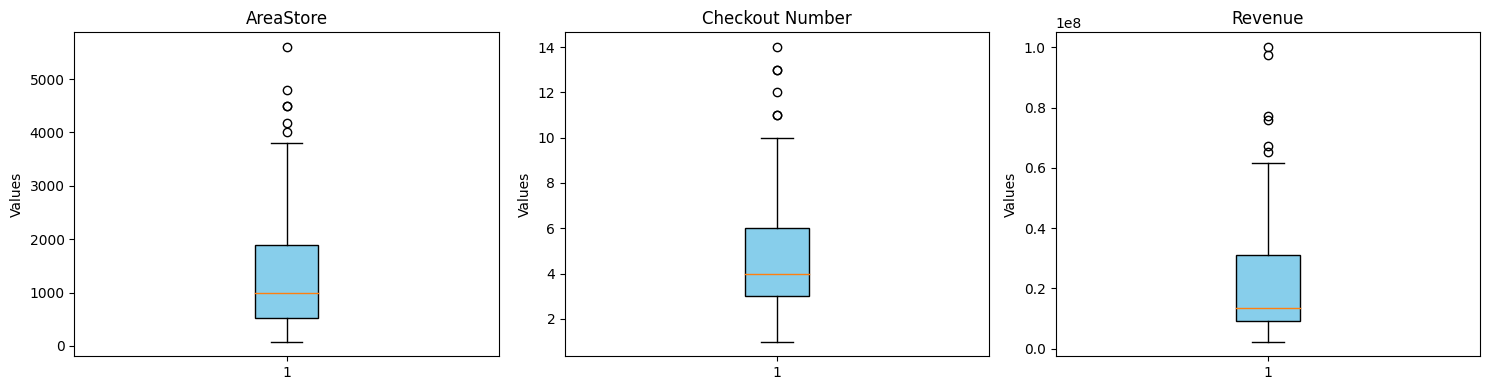

In [9]:
# Chart for continuous variables

import matplotlib.pyplot as plt

def continuous_boxplots(cont_var, df):
    n = len(cont_var)

    fig, axes = plt.subplots(1, n, figsize=(5 * n, 4))

    for i, var in enumerate(cont_var):
        axes[i].boxplot(df[var].dropna(), vert=True, patch_artist=True, boxprops=dict(facecolor='skyblue'))
        axes[i].set_title(f"{var}")
        axes[i].set_ylabel("Values")

    plt.tight_layout()
    plt.show()




continuous_boxplots(continuous_var, df)

2. Make a result for relationship between 'Old/New' and 'Type' using Cross-Tabulation and a count plot.Describe the output and write your opinion about the relationship.

In [10]:
# Cross Tab between Old/New & Type

cross_tab_Old_New_Type = pd.crosstab(df['Old/New'], df['Type'], normalize='index')
print(cross_tab_Old_New_Type)

Type      Express     Extra     Hyper
Old/New                              
New      0.411765  0.323529  0.264706
Old      0.812500  0.187500  0.000000


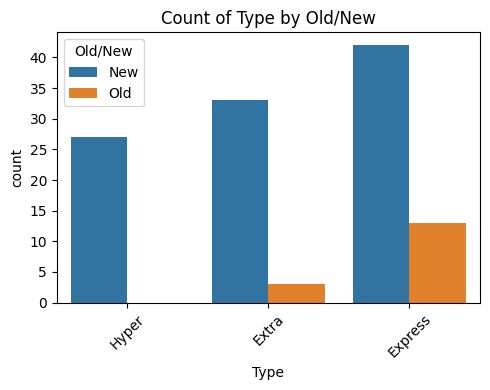

In [11]:
# Count Plot: Old/New & Type

fig, ax = plt.subplots(figsize=(5, 4))
sns.countplot(data=df, x='Type', hue='Old/New', ax=ax)
plt.title("Count of Type by Old/New")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

It appears that the store type (Old or New) influences, or at least is associated with, the type of product or service offered (Type). This insight can be valuable for making decisions related to marketing strategies or resource allocation.

3. Make a result for relationship between 'Old/New' and 'Revenue' using Pivot Table  and a Violin Plot.Describe the output and write your opinion about the relationship.

In [12]:
# Pivot Table between Old/New & Type

pivot_table_Old_New_Revenue = df.pivot_table(values='Revenue', index='Old/New', aggfunc=['min','max','mean','std'])
print(pivot_table_Old_New_Revenue)

             min        max          mean           std
         Revenue    Revenue       Revenue       Revenue
Old/New                                                
New      2336000  100083000  2.489088e+07  2.119451e+07
Old      2452500   32461000  1.093125e+07  8.846250e+06


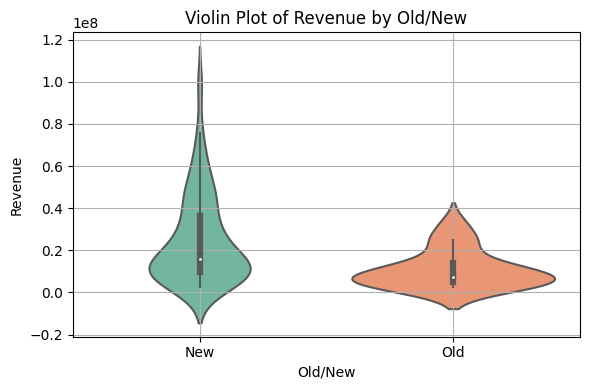

In [13]:
# Violin Plot: Old/New & Type

plt.figure(figsize=(6, 4))
sns.violinplot(data=df, x='Old/New', y='Revenue', palette='Set2')

plt.title('Violin Plot of Revenue by Old/New')
plt.xlabel('Old/New')
plt.ylabel('Revenue')
plt.grid(True)
plt.tight_layout()
plt.show()

Based on the pivot table, we see that the average revenue (`mean`) differs between the 'Old' and 'New' store categories, with some variation in minimum, maximum, and standard deviation values as well.

The violin plot illustrates the distribution of revenue for both 'Old' and 'New' stores. It shows not only the central tendency but also the spread and density of the revenue data. For example, one category may have a wider spread or more pronounced peaks, indicating variability or concentration in certain revenue ranges.


There appears to be a noticeable difference in revenue between old and new stores. This suggests that store age/status may have an impact on revenue performance. Understanding this relationship can help in targeting business strategies such as improving revenue in underperforming stores or leveraging strengths in others.


4. Make an approperiate graph for showing the relationship between 'Property','Old/New' and 'Revenue'.Describe the output and write your opinion about the relationship.

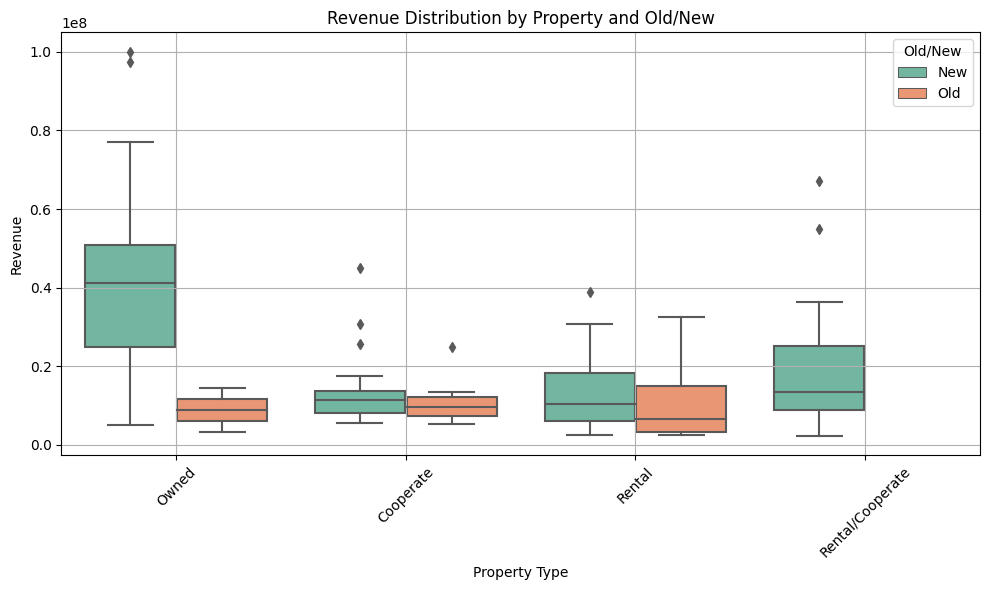

In [14]:
# Box PLot: relationship between Property, Old/New and Revenue

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Property', y='Revenue', hue='Old/New', palette='Set2')

plt.title('Revenue Distribution by Property and Old/New')
plt.xlabel('Property Type')
plt.ylabel('Revenue')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

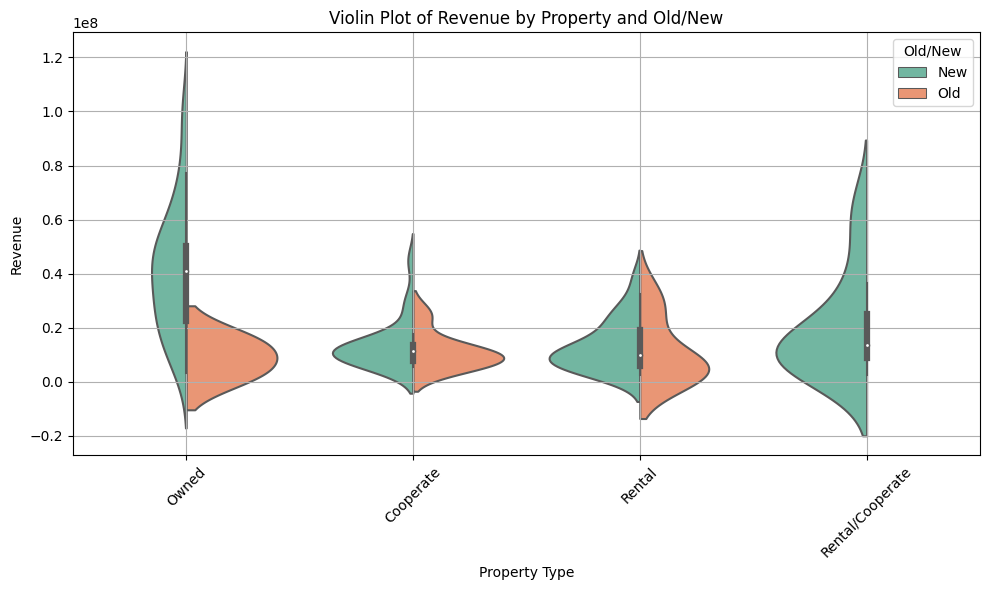

In [15]:
# Violin Plot: relationship between Property, Old/New and Revenue

plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x='Property', y='Revenue', hue='Old/New', split=True, palette='Set2')

plt.title('Violin Plot of Revenue by Property and Old/New')
plt.xlabel('Property Type')
plt.ylabel('Revenue')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

The box plot illustrates how the distribution of Revenue varies across different Property types and between Old and New stores.

The plot shows that for each Property category, Old and New stores may have different average revenues and variability. Generally, some Property types exhibit higher median revenues, and the revenue patterns differ between Old and New stores within these categories. Additionally, the range of revenue values in certain groups is wider, indicating diverse performance among stores of the same Property type.


Both the store status (Old vs. New) and the Property type jointly influence Revenue. This insight can help managers tailor their sales and marketing strategies according to Property types and store status, allowing for better resource allocation.


5. Create a Pair Plot for investigating pairwise relationship in 'AreaStore','Checkout Number' and 'Revenue'.Describe the output and write your opinion about the relationship.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


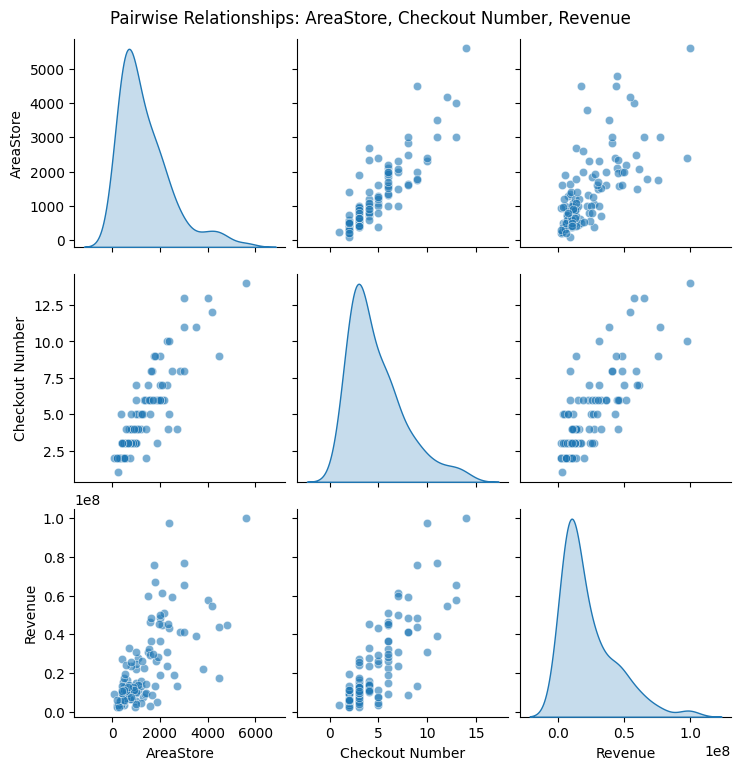

In [16]:

selected_var = ['AreaStore', 'Checkout Number', 'Revenue']

sns.pairplot(df[selected_var], kind='scatter', diag_kind='kde', plot_kws={'alpha': 0.6})
plt.suptitle("Pairwise Relationships: AreaStore, Checkout Number, Revenue", y=1.02)
plt.show()

The pair plot shows the pairwise relationships among the variables 'AreaStore', 'Checkout Number', and 'Revenue'.

From the scatter plots, we can observe positive correlations between these variables: larger store areas tend to have more checkouts, and both larger areas and higher checkout numbers are associated with higher revenue. The diagonal KDE plots show the distribution of each variable, indicating some skewness, especially in 'Revenue'.


This suggests that store size and checkout activity are important factors related to revenue generation. Increasing either the store area or the number of checkouts could potentially boost revenue, but further analysis is needed to confirm causation.
